<a href="https://colab.research.google.com/github/ok3251/MNIST_ML/blob/main/MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 전처리
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255.0
x_test = x_test / 255.0

# 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 정의
n_input = 784
n_hidden1 = 512
n_hidden2 = 256
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,),
              kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

# 모델 컴파일
mlp.compile(loss='mse', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 모델 학습
hist = mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=0)

# 모델 평가
res = mlp.evaluate(x_test, y_test, verbose=2)
print('정확률: ', res[1] * 100)


11490434/11490434 [==============================] - 0s 0us/step
313/313 - 1s - loss: 0.0036 - accuracy: 0.9826 - 511ms/epoch - 2ms/step
정확률:  98.25999736785889


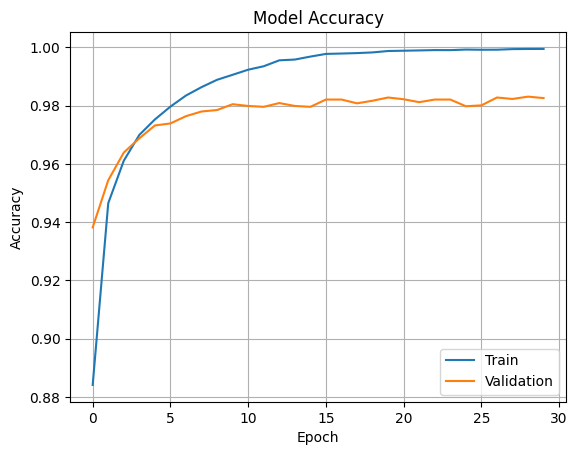

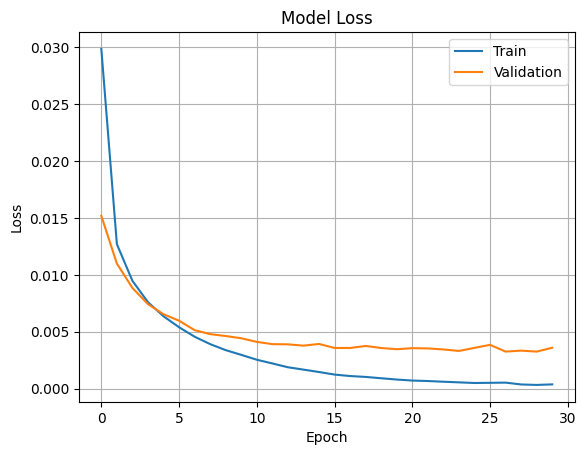

In [ ]:
import matplotlib.pyplot as plt

# 모델 정확도 시각화
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.grid()
plt.show()

# 모델 손실 시각화
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.grid()
plt.show()
